# Q_Q plot

Q_Q plot is graphical tool use to see similarity between two datasets. 

In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= sns.load_dataset("iris")

First way to check if column distribution is normal or not

-> Histogram or KDE plot 

<Axes: xlabel='sepal_length', ylabel='Density'>

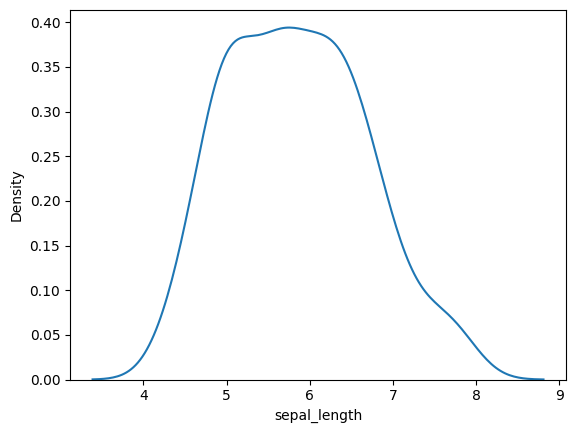

In [6]:
sns.kdeplot(df['sepal_length'])


In [9]:
temp= sorted(df['sepal_length'].to_list()) # sorting becasue we want to rank the data points as well, like we do in percentile 

In [10]:
x_quant= []
for i in range(1, 101): 
    x_quant.append(np.percentile(temp, i))

In [14]:
sample = np.random.normal(loc=0, scale= 1, size= 1000) # theoritical standard normal distribution

temp2= sorted(sample)

In [15]:
y_quant= []
for i in range(1, 101): 
    y_quant.append(np.percentile(temp2, i))

<Axes: >

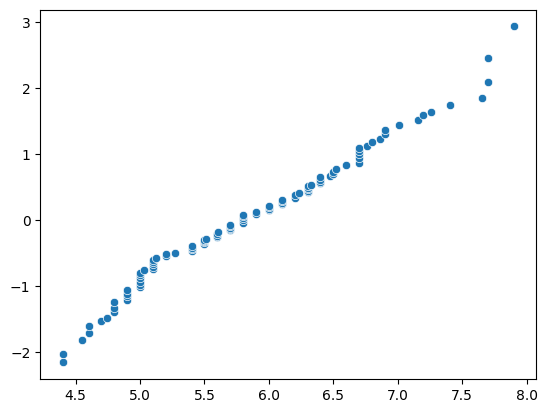

In [ ]:
sns.scatterplot(x= x_quant, y=y_quant)

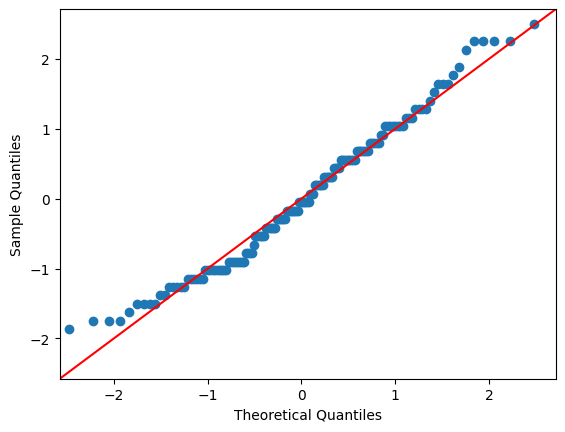

In [ ]:
# using stats models 

import statsmodels.api as sm

# Creating q-q plo 
fig= sm.qqplot(df['sepal_length'], line='45', fit=True) # fit normalized both data to be able to compare, line= 45 is to compare our data to normal distribution

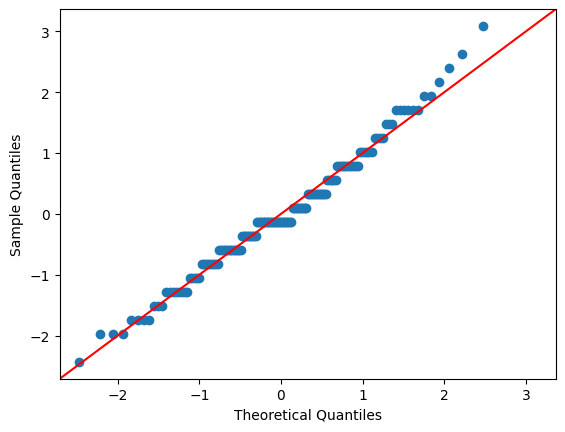

In [28]:
fig= sm.qqplot(df['sepal_width'], line='45', fit=True) 

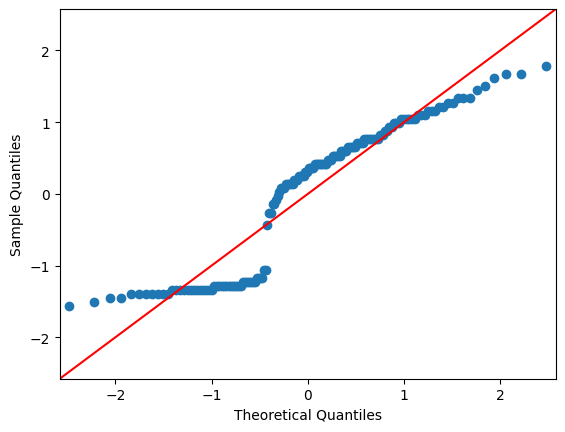

In [ ]:
fig= sm.qqplot(df['petal_length'], line='45', fit=True) 

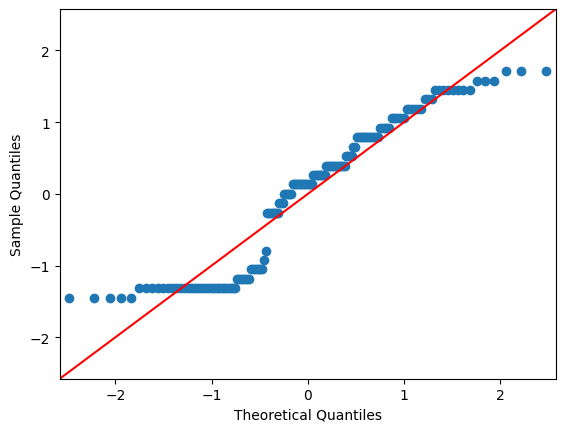

In [30]:
fig= sm.qqplot(df['petal_width'], line='45', fit=True) 

Q-Q plot comparing with uniform distribution 

In [36]:
x= np.random.uniform(low=0, high=1, size= 1000)

In [42]:
import scipy.stats as stats
# .fit(x) estimates the parameters of a uniform distribution that best fit your data x, using Maximum Likelihood Estimation (MLE).
print(x.min(), x.max()- x.min())
# loc = the starting point (the minimum value of the distribution).
# scale = the width of the interval (basically max - min).
params= stats.uniform.fit(x)
params # gives us lowest and highest of the sample 

# stats.norm.fit(x) returns (mu, sigma)
# mu = mean
# sigma = standard deviation

# (stats.expon)
# loc = the shift (default 0, so the distribution starts at 0)
# scale = mean = 1/λ
# Note the “true” exponential is just the special case where loc = 0.
# That’s why fit returns two parameters: (loc, scale).

0.001263019626908335 0.998627487873685


(0.001263019626908335, 0.998627487873685)

In [43]:
dist=stats.uniform(loc=params[0], scale= params[1] )

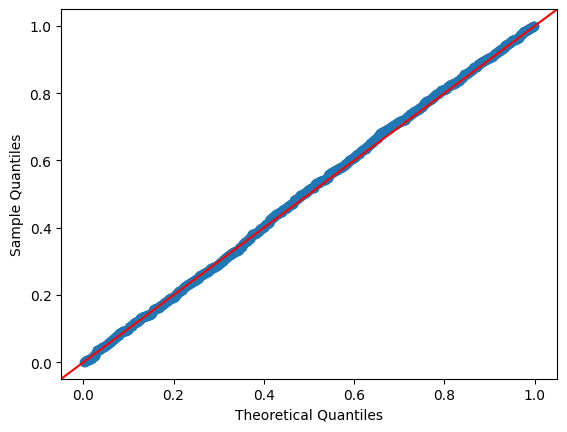

In [51]:
fig = sm.qqplot(x,dist= dist, line='45')

# Basically we compared two uniform distribution, just to show qq plot can compare any two distribution

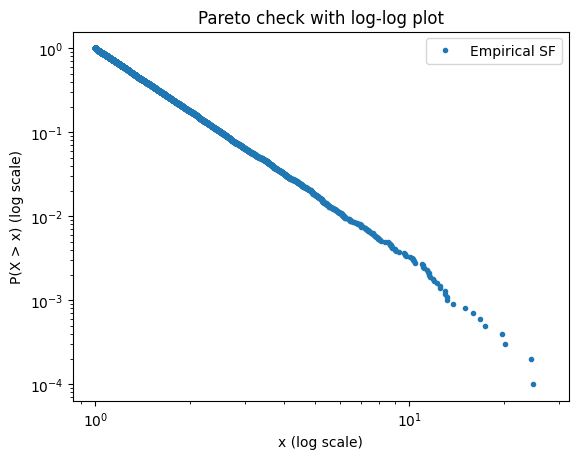

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Pareto-distributed data
alpha = 2.5
xm = 1
data = (np.random.pareto(alpha, 10000) + 1) * xm  # Pareto samples

# Survival function (empirical)
x = np.sort(data)
survival = 1 - np.arange(1, len(x)+1) / len(x)

# Plot on log-log axes
plt.loglog(x, survival, marker=".", linestyle="none", label="Empirical SF")
plt.xlabel("x (log scale)")
plt.ylabel("P(X > x) (log scale)")
plt.title("Pareto check with log-log plot")
plt.legend()
plt.show()
